In [1136]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import scipy.io
import os
import matplotlib.pyplot as plt
from scipy.ndimage import zoom
import numpy as np
import random
from pathlib import Path

In [1137]:
# ================================
# 0) Set the correct patient
# ================================
lesion = 36  # <- change this to pick a different lesion


BASE   = Path("/Users/luozisheng/Desktop/DOT/FEM_clinical/tar_ref")
GT_DIR = Path("/Users/luozisheng/Desktop/DOT/FEM_clinical/gt")
out_root = Path("/Users/luozisheng/Desktop/DOT/DOT-AE-GAN/SIMULATION_to_PERTURBATION/output")
out_dir  = out_root / f"lesion_{lesion}"
out_dir.mkdir(parents=True, exist_ok=True)
assert out_dir.exists(), f"Could not create folder: {out_dir}"


df_ref = pd.read_csv(BASE   / f"reference{lesion}.csv", skiprows=4)
df_tar = pd.read_csv(BASE   / f"target{lesion}.csv",    skiprows=4)
df_gt  = pd.read_csv(GT_DIR / f"gt{lesion}.csv",        skiprows=9, header=None)# your file has 9 header lines (like MATLAB NumHeaderLines=9)

In [1138]:
df_ref.head()

,% theta,z_chest,mua0,musp0,mua_chest,t_radius,depth,mua_tar,p,"u/100 (1), Point: 4",...,"u/100 (1), Point: 10","u/100 (1), Point: 11","u/100 (1), Point: 15","u/100 (1), Point: 16","u/100 (1), Point: 31","u/100 (1), Point: 46","u/100 (1), Point: 48","u/100 (1), Point: 49","u/100 (1), Point: 51","u/100 (1), Point: 52"
0,0,2,0.02,4,0.1,1,1,0.1,1,-1.9412923627920782E-5+3.335564606619854E-5i,...,-9.395024571732806E-6+1.364599535339016E-4i,1.0464208460957524E-4+3.6881305187073536E-4i,-1.5431964154239877E-5+1.1009676766229651E-4i,4.2069427576186825E-5+2.6306978152449296E-4i,4.082897735084578E-4+7.235725662010883E-4i,1.5188641993156186E-4+4.3511700263451365E-4i,9.793520883875264E-4+0.0011935997933513662i,5.379985587230069E-5+2.82868747841858E-4i,0.00146400534702796+0.0015170127186253381i,2.5681380899260955E-4+5.621488760111864E-4i
1,0,2,0.02,4,0.1,1,1,0.1,2,-1.6745791338871086E-5+1.0439426237863098E-4i,...,7.620299376938144E-5+3.241871358551486E-4i,5.941258748922271E-4+8.944789007138652E-4i,8.82718215818158E-6+1.907755510806385E-4i,2.014423384257212E-4+5.00158850072919E-4i,0.0012025342794545074+0.0013517577874424859i,3.0740287973678393E-4+6.219147825355585E-4i,0.0014743949545451592+0.0015281931587612688i,7.002486900798396E-5+3.134519628859562E-4i,0.0010472782504915492+0.001246601106712124i,1.7423269775753808E-4+4.655540416775276E-4i
2,0,2,0.02,4,0.1,1,1,0.1,3,3.8149020480973854E-5+2.5582741885202606E-4i,...,2.4790681554802147E-4+5.562495578522684E-4i,0.0013759709508976892+0.0014664660273592197i,2.5964100448691554E-5+2.3108794240953256E-4i,3.1647017269097557E-4+6.320466536002837E-4i,0.001381595417286551+0.0014693338698108652i,2.4956616809388983E-4+5.577868632925197E-4i,8.148129151425198E-4+0.0010749120848390068i,2.636696541551984E-5+2.3156012942080682E-4i,3.055989814130444E-4+6.201577798303381E-4i,3.851225942047118E-5+2.5662779422410493E-4i
3,0,2,0.02,4,0.1,1,1,0.1,4,1.7369479443984424E-4+4.6388207408794144E-4i,...,3.054866873022433E-4+6.191239608281068E-4i,0.0011947894497441973+0.0013454052473527306i,8.719410237259616E-6+1.9018646985273534E-4i,2.0032825792912852E-4+4.98326768328276E-4i,5.908163829360071E-4+8.910055625313227E-4i,7.581104026557472E-5+3.2322916381259664E-4i,1.8716252550323017E-4+4.8154409310506E-4i,-1.3425086040474576E-5+1.2006033257237774E-4i,2.4598375202693788E-5+2.2734945928396162E-4i,-1.67476794443774E-5+1.0414876395130142E-4i
4,0,2,0.02,4,0.1,1,1,0.1,5,2.599375341028233E-4+5.632837100315131E-4i,...,1.5213190847743565E-4+4.35130823140725E-4i,4.075245221172234E-4+7.231872614972414E-4i,-1.529793412552955E-5+1.1028816505985119E-4i,4.237695419917139E-5+2.6337028227668317E-4i,1.0550122896026854E-4+3.695141029435396E-4i,-9.182688847971033E-6+1.3675840292978376E-4i,4.693737062212043E-7+1.6761449421702758E-4i,-2.0907236230675556E-5+4.724728871367113E-5i,-2.1011967928322467E-5+6.895770293875165E-5i,-1.9376867764691E-5+3.3490505494353074E-5i


In [1139]:
df_tar.head()

,% theta,z_chest,mua0,musp0,mua_chest,t_radius,depth,mua_tar,p,"u/100 (1), Point: 4",...,"u/100 (1), Point: 10","u/100 (1), Point: 11","u/100 (1), Point: 15","u/100 (1), Point: 16","u/100 (1), Point: 31","u/100 (1), Point: 46","u/100 (1), Point: 48","u/100 (1), Point: 49","u/100 (1), Point: 51","u/100 (1), Point: 52"
0,0,2,0.02,4,0.1,1,1,0.1,1,-1.7470328684612012E-5+3.056826304528689E-5i,...,-7.028915638773625E-6+1.251890913536908E-4i,1.014117283747915E-4+3.3529944169840854E-4i,-1.3114945012113698E-5+1.0345497585848719E-4i,4.2820042524182567E-5+2.4393788816162048E-4i,3.9346161108668164E-4+6.680354562091784E-4i,1.5065134634904763E-4+4.111835508036689E-4i,9.594284548856718E-4+0.0011338980535005856i,5.556901811071147E-5+2.722932480005991E-4i,0.001454579004435878+0.0014782854161105121i,2.576521499458654E-4+5.480912383650858E-4i
1,0,2,0.02,4,0.1,1,1,0.1,2,-1.3402716949194652E-5+9.613129487962199E-5i,...,7.613794646301497E-5+2.9452784809820754E-4i,5.679477726244516E-4+8.113263616153185E-4i,1.1390521580275075E-5+1.7341669328261312E-4i,1.9409010242057512E-4+4.526233939977825E-4i,0.0011407314970257436+0.0012226820878879778i,2.944409190874758E-4+5.651215503075504E-4i,0.0014053112670967447+0.001396076225103047i,7.009932904846807E-5+2.8776941332338854E-4i,0.0010131361159203109+0.001161512170333137i,1.713021935653837E-4+4.3274779078878323E-4i
2,0,2,0.02,4,0.1,1,1,0.1,3,4.1271056543904546E-5+2.480674745484979E-4i,...,2.485505386694338E-4+5.298064394086051E-4i,0.0013554650388141584+0.0013926795206171383i,2.893905612073088E-5+2.1661500979062954E-4i,3.1250066566042105E-4+5.918082315197498E-4i,0.0013400013491624801+0.0013629060118494003i,2.4337360553909065E-4+5.126229240309126E-4i,7.762217636362301E-4+9.744025330371749E-4i,2.84206980868568E-5+2.1191723699135137E-4i,2.9056662653404114E-4+5.588806140920557E-4i,3.941724349130497E-5+2.3269541741499444E-4i
3,0,2,0.02,4,0.1,1,1,0.1,4,1.7545528129936597E-4+4.6129883538542095E-4i,...,3.0792903519864524E-4+6.09839016661995E-4i,0.0011939663147325307+0.0013181351607430242i,1.0998765834487896E-5+1.8546703483591449E-4i,2.0247300057464707E-4+4.842629645940429E-4i,5.866587369740127E-4+8.525201843604172E-4i,7.785704553214919E-5+3.0788039369161356E-4i,1.8444887597584476E-4+4.468193752266949E-4i,-1.095561688862736E-5+1.13840696269833E-4i,2.5826955984150572E-5+2.0732509019974466E-4i,-1.4212106806860448E-5+9.668587841793388E-5i
4,0,2,0.02,4,0.1,1,1,0.1,5,2.6064644748935017E-4+5.627801378508094E-4i,...,1.5366811588137964E-4+4.3297184474410343E-4i,4.099800686915607E-4+7.161426852592689E-4i,-1.4247457572702827E-5+1.0929810592434128E-4i,4.430880826363099E-5+2.599848396002674E-4i,1.0825967053656564E-4+3.594254841146601E-4i,-7.139872727575604E-6+1.3307643255400467E-4i,3.2706316456641805E-6+1.5871775578866075E-4i,-1.9660461199047172E-5+4.5915899665228014E-5i,-1.8686221610402274E-5+6.412295738239846E-5i,-1.7989495814032785E-5+3.1871013765250394E-5i


In [1140]:
df_ref.size

9315

In [1141]:
all_data_tar = []
all_data_ref = []
target_radiuses = []
target_depths = []
mua_tars = []


for i in range(len(df_tar)//9):
    data9_ref = []
    data9_tar = []
    target_radius = df_tar['t_radius'].iloc[i*9]
    target_depth = df_tar['depth'].iloc[i*9]
    mua_tar = df_tar['mua_tar'].iloc[i*9]

    mua0 = df_tar['mua0'].iloc[i*9]

    for j in range(9):
        indx = i*9 + j
        #print(indx)
        data14_tar = df_tar.iloc[indx,-14: ]
        data9_tar.append(data14_tar)

        data14_ref = df_ref.iloc[indx,-14: ]
        data9_ref.append(data14_ref)

    if mua0 != 0.8:
        target_radiuses.append(target_radius)
        target_depths.append(target_depth) #
        mua_tars.append(mua_tar)

        all_data_ref.append(data9_ref)
        all_data_tar.append(data9_tar)

All_DATA_TAR = np.array(all_data_tar)
All_DATA_REF = np.array(all_data_ref)

def convert_to_complex(s):
    # Replace 'i' with 'j'
    s = s.replace('i', 'j')
    try:
        return complex(s)
    except ValueError:
        return None  # or handle the error as needed
vectorized_conversion = np.vectorize(convert_to_complex)

All_DATA_TAR = vectorized_conversion(All_DATA_TAR)
All_DATA_REF = vectorized_conversion(All_DATA_REF)

All_DATA_TAR = All_DATA_TAR[:,:, [2,6,11,13,9,7,5,0,8,10,12,4,3,1]]
All_DATA_REF = All_DATA_REF[:,:, [2,6,11,13,9,7,5,0,8,10,12,4,3,1]]

In [1142]:

# Define s_geom and d_geom arrays
s_geom = np.array([
    [2.794, 1.408, 0.000],
    [1.397, 1.408, 0.000],
    [0.000, 1.408, 0.000],
    [-1.397, 1.408, 0.000],
    [-2.794, 1.408, 0.000],
    [2.096, 2.678, 0.000],
    [0.000, 2.678, 0.000],
    [-2.096, 2.678, 0.000],
    [0.000, 4.012, 0.000]
])

d_geom = np.array([
    [-1.746, -3.267, 0.000],
    [0.000, -3.581, 0.000],
    [1.746, -3.627, 0.000],
    [2.667, -2.688, 0.000],
    [1.016, -2.569, 0.000],
    [0.000, -2.569, 0.000],
    [-0.508, -1.68, 0.000],
    [-2.667, -2.688, 0.000],
    [0.508, -1.68, 0.000],
    [1.524, -1.68, 0.000],
    [2.54, -1.68, 0.000],
    [-1.016, -2.569, 0.000],
    [-1.524, -1.68, 0.000],
    [-2.54, -1.68, 0.000],
])

# Compute sddist variable
Ns = len(s_geom)
Nd = len(d_geom)

#print(Ns, Nd)
sddist = np.zeros((Ns, Nd))

for ss in range(Ns):
    for dd in range(Nd):
        sddist[ss, dd] = np.linalg.norm(s_geom[ss] - d_geom[dd])

In [1143]:

def determine_background_optical_property(Mea_ref, Mea_tar):
    caliamp_ref = np.log(sddist**2 * np.abs(Mea_ref))
    pha_ref = np.angle(Mea_ref)
    caliamp_tar = np.log(sddist**2 * np.abs(Mea_tar))
    pha_tar = np.angle(Mea_tar)

    # Compute statistics fitting for reference measurement
    ki_ref = np.polyfit(sddist.reshape(-1), caliamp_ref.reshape(-1), 1)[0]
    kr_ref = np.abs( np.polyfit(sddist.reshape(-1), pha_ref.reshape(-1), 1)[0])

    # compute statistics fitting for target measurement
    ki_tar = np.polyfit(sddist.reshape(-1), caliamp_tar.reshape(-1), 1)[0]
    kr_tar = np.abs( np.polyfit(sddist.reshape(-1), pha_tar.reshape(-1), 1)[0])

    # Uncomment to compute additional variables
    w = 2 * np.pi * 140e6
    vel = 3e10 / 1.33
    D = w / 2 / ki_ref / kr_ref / vel
    ref_ua0 = (-ki_ref ** 2 + kr_ref ** 2) * D
    ref_us0 = -1 / 3 / D

    D_tar = w / 2 / ki_tar / kr_tar / vel
    tar_ua0 = (-ki_ref ** 2 + kr_ref ** 2) * D_tar
    tar_us0 = -1 / 3 / D_tar

    return [np.abs(ref_ua0), np.abs(ref_us0), np.abs(tar_ua0), np.abs(tar_us0)]

In [1144]:
def insert_sphere(array, depth, radius, mua = 1):
    z_range = np.linspace(0.5, 3.5, array.shape[0])
    x_range = np.linspace(-4, 4, array.shape[1])
    y_range = np.linspace(-4, 4, array.shape[2])

    # Get the index of the depth in the z-axis
    z_index = np.abs(z_range - depth).argmin()

    # Get the center index of the array
    center_x = array.shape[1] // 2
    center_y = array.shape[2] // 2
    center_z = z_index

    for i in range(array.shape[1]):
        for j in range(array.shape[2]):
            for k in range(array.shape[0]):
                # Calculate distance from the center
                distance = np.sqrt((x_range[i] - 0) ** 2 + (y_range[j] - 0) ** 2 + (z_range[k] - depth) ** 2)
                distance_test = (z_range[k] - depth) ** 2
                if distance <= radius and distance_test < 0.75*radius**2:
                    array[k, i, j] = mua  # or any other value you choose for the sphere

    return array

In [1145]:

def insert_elliptical_sphere(array, depth, a_radius, b_radius, c_radius, mua=1):
    z_range = np.linspace(0.5, 3.5, array.shape[0])
    x_range = np.linspace(-4, 4, array.shape[1])
    y_range = np.linspace(-4, 4, array.shape[2])

    # Get the index of the depth in the z-axis
    z_index = np.abs(z_range - depth).argmin()

    # Get the center index of the array
    center_x = array.shape[1] // 2
    center_y = array.shape[2] // 2
    center_z = z_index

    for i in range(array.shape[1]):
        for j in range(array.shape[2]):
            for k in range(array.shape[0]):
                # Calculate distance from the center, considering the ellipsoid
                #distance_test = ((x_range[i] - 0) ** 2 / (a_radius ** 2)) + ((y_range[j] - 0) ** 2 / (b_radius ** 2))
                distance_test = (z_range[k] - depth) ** 2 / (c_radius ** 2)

                distance = ((x_range[i] - 0) ** 2 / (a_radius ** 2)) + ((y_range[j] - 0) ** 2 / (b_radius ** 2)) + ((z_range[k] - depth) ** 2 / (c_radius ** 2))
                if distance <= 1 and distance_test<0.75:
                    array[k, i, j] = mua  # or any other value you choose for the ellipsoid

    return array


In [1146]:
def estimate_depth_radius(vol_zxy, ux, uy, uz):
    """
    vol_zxy: (nz, 33, 33) absorption volume for one sample.
    Returns (depth_cm, radius_cm) using a simple two-level threshold.
    """
    # Get background & lesion levels robustly
    vals = vol_zxy[np.isfinite(vol_zxy)].ravel()
    if vals.size == 0:
        return np.nan, np.nan
    # Collapse near-identical values, then pick min and max
    uniq = np.unique(np.round(vals, 4))
    bg = float(uniq.min())
    tar = float(uniq.max())
    thr = 0.5 * (bg + tar)

    # Area per slice (number of pixels above threshold)
    nz = vol_zxy.shape[0]
    areas_pix = np.array([(vol_zxy[k] > thr).sum() for k in range(nz)], dtype=float)

    if areas_pix.max() == 0:
        return np.nan, np.nan  # nothing detected

    # Depth (area-weighted average of slice depths)
    depth_cm = float((areas_pix * uz).sum() / areas_pix.sum())

    # Radius from the largest cross-section (equivalent-circle radius)
    kmax = int(areas_pix.argmax())
    dx = float(ux[1] - ux[0])
    dy = float(uy[1] - uy[0])
    area_cm2 = areas_pix[kmax] * dx * dy
    radius_cm = float(np.sqrt(area_cm2 / np.pi))

    return depth_cm, radius_cm

In [1147]:
# ================================
# 1) Preparing All_ground_truth
# ================================

# columns: x, y, z, val_1, val_2, ...
x = df_gt.iloc[:, 0].to_numpy()
y = df_gt.iloc[:, 1].to_numpy()
z = df_gt.iloc[:, 2].to_numpy()
values = df_gt.iloc[:, 3:].to_numpy()  # shape: (num_points, num_columns)

# robust unique axes (rounding avoids tiny FP jitter)
def uniq_robust(a, decimals=6):
    return np.unique(np.round(a, decimals=decimals))

ux = uniq_robust(x)
uy = uniq_robust(y)
uz = uniq_robust(z)

# enforce 33x33 in x,y (COMSOL config)
if len(ux) != 33 or len(uy) != 33:
    # try a couple of different roundings before falling back
    for dec in (7, 5, 8, 4):
        ux2 = uniq_robust(x, dec)
        uy2 = uniq_robust(y, dec)
        if len(ux2) == 33 and len(uy2) == 33:
            ux, uy = ux2, uy2
            break

# map each row to integer indices on the 33x33x(7) grid
# (round the coordinates the same way we built ux/uy to keep alignment)
rnd = 6
xi = np.searchsorted(ux, np.round(x, rnd))
yi = np.searchsorted(uy, np.round(y, rnd))
zi = np.searchsorted(uz, np.round(z, rnd))

# ---- Step 2: build All_ground_truth = (N, 7, 33, 33) ----
def column_to_volume(col_1d: np.ndarray) -> np.ndarray:
    """Scatter flat column onto a (nz, 33, 33) array using (zi, xi, yi)."""
    nz = len(uz)
    vol = np.zeros((nz, 33, 33), dtype=np.float32)
    vol[zi, xi, yi] = col_1d.astype(np.float32)
    return vol

# how many samples to build (target 15)
N = len(df_tar)//9

All_ground_truth = np.stack(
    [column_to_volume(values[:, j]) for j in range(N)],
    axis=0
)  # shape: (N, 7, 33, 33)

print("All_ground_truth.shape =", All_ground_truth.shape)

All_ground_truth.shape = (45, 7, 33, 33)


In [1148]:
values.shape

(7623, 405)

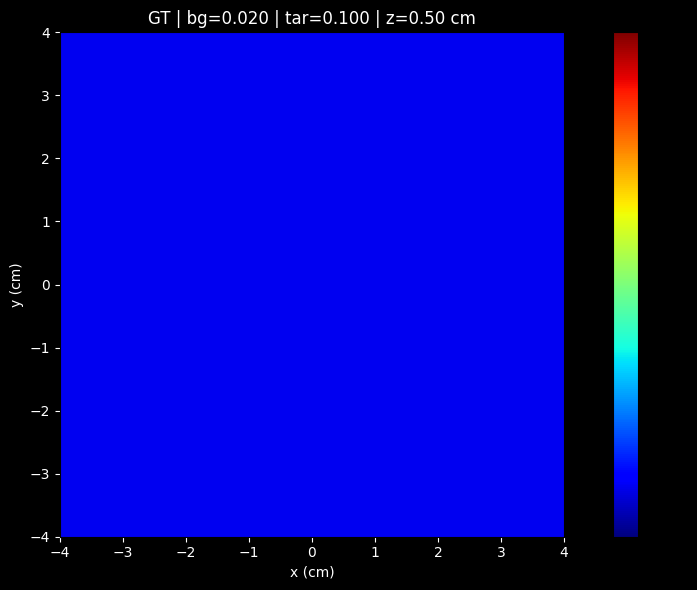

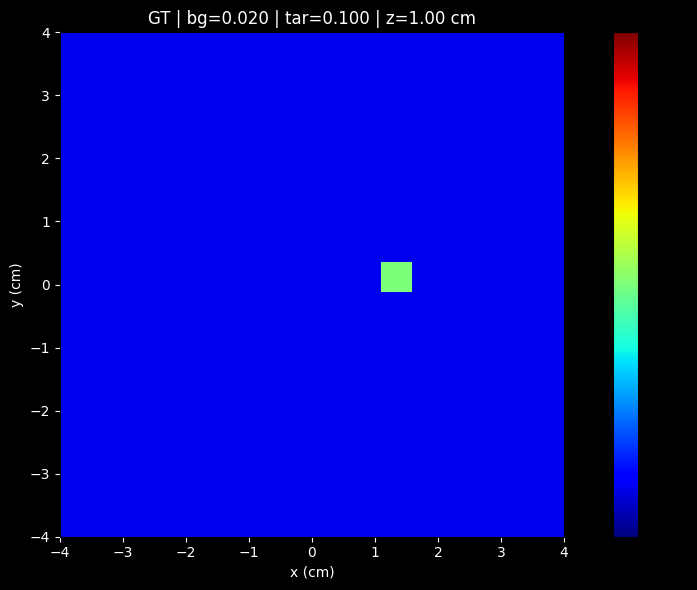

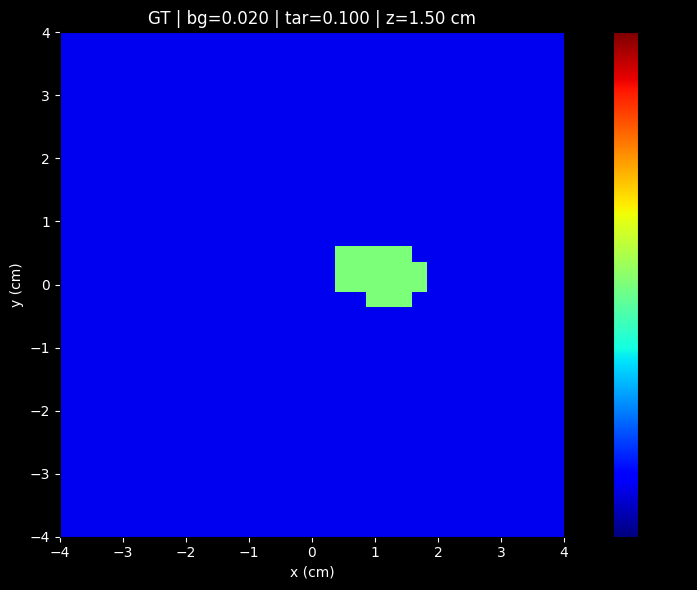

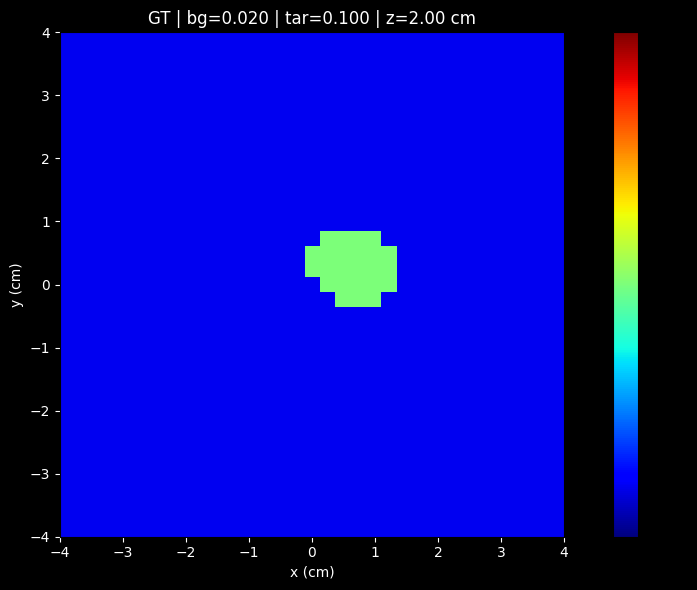

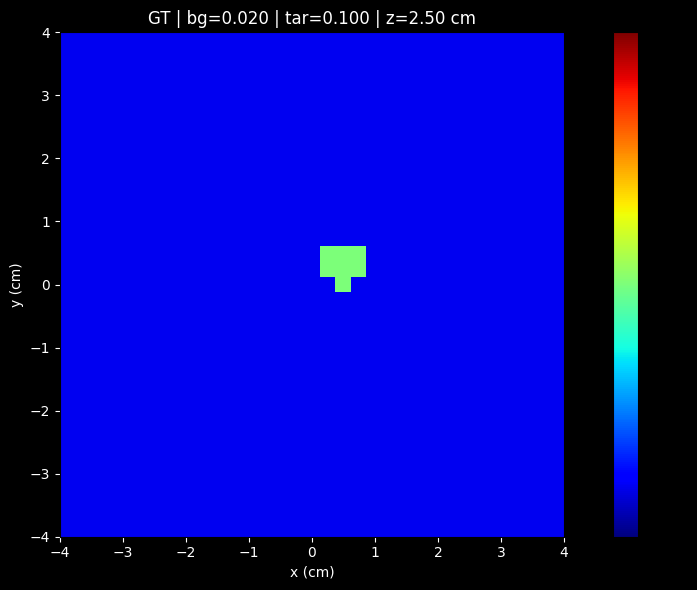

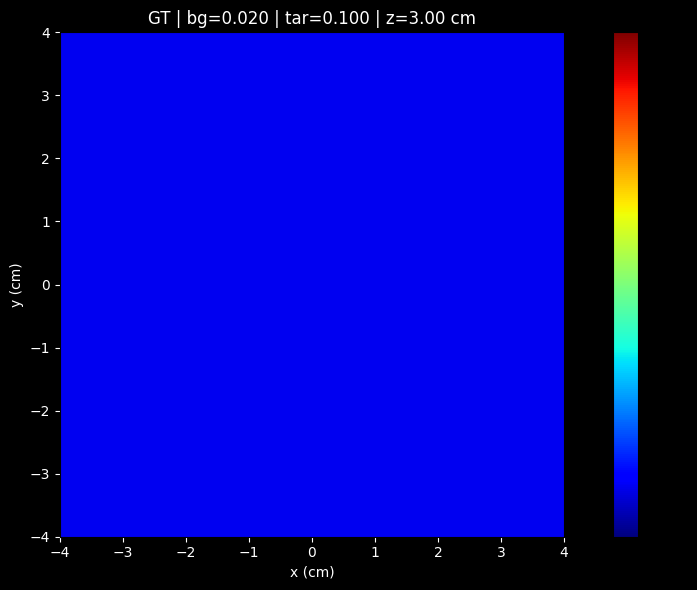

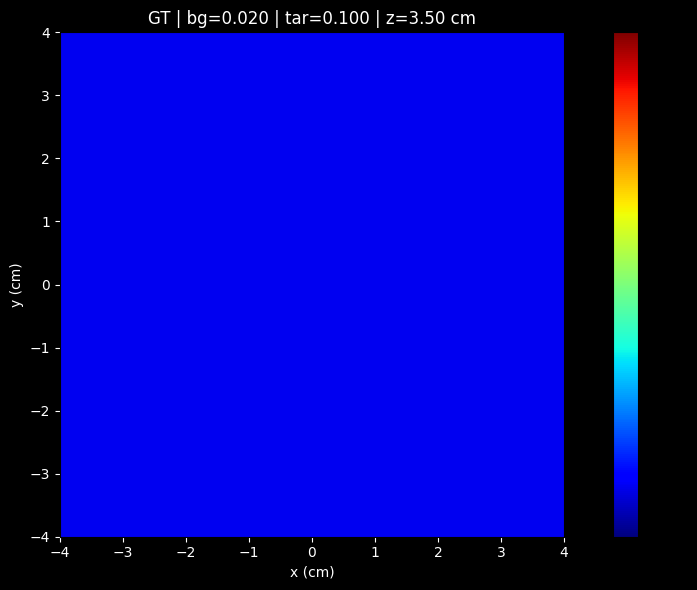

In [1149]:
# ======================================
# 2) Visualization of All_ground_truth
# ======================================
def guess_bg_tar(vol):
    """Heuristic: take nonzero values, choose min as bg and max as tar."""
    vals = vol[np.isfinite(vol)]
    vals = vals[vals > 0] if (vals > 0).any() else vals
    if vals.size == 0:
        return 0.0, 0.0
    return float(vals.min()), float(vals.max())

def plot_volume_slices(vol, sample_idx=0, vmin=0.0, vmax=0.2, show=True):
    """vol: (nz, 33, 33)"""
    bg, tar = guess_bg_tar(vol)
    for k in range(vol.shape[0]):
        img = vol[k, :, :]  # (x,y) plane at z = uz[k]

        fig = plt.figure(figsize=(10, 6), facecolor='k')
        ax = plt.gca()
        ax.set_facecolor('k')

        im = plt.imshow(
            img.T,                      # transpose to match MATLAB imagesc(..., slice')
            origin="lower",             # y increases upward
            extent=[ux.min(), ux.max(), uy.min(), uy.max()],
            vmin=vmin, vmax=vmax,
            cmap='jet'
        )
        plt.colorbar(im)
        plt.title(f"GT | bg={bg:.3f} | tar={tar:.3f} | z={uz[k]:.2f} cm", color='w')
        plt.xlabel("x (cm)", color='w'); plt.ylabel("y (cm)", color='w')
        ax.tick_params(colors='w')
        ax.set_aspect('equal')
        plt.tight_layout()

        if show:
            plt.show()
        else:
            plt.close(fig)

# Example: visualize sample 0 (all 7 z-slices) and save PNGs
plot_volume_slices(All_ground_truth[0], sample_idx=0, vmin=0.0, vmax=0.2, show=True)


In [1150]:
# ======================================
# 3) Preparing Target_depth_radius
# ======================================
Target_depth_radius = []
for n in range(All_ground_truth.shape[0]):
    d, r = estimate_depth_radius(All_ground_truth[n], ux, uy, uz)
    Target_depth_radius.append([d, 2 * r])

# ======================================
# 4) Visualize Target_depth_radius
# ======================================
Target_depth_radius = np.array(Target_depth_radius, dtype=float)
print("Target_depth_radius shape:", Target_depth_radius.shape)
print(Target_depth_radius[:5])

Target_depth_radius shape: (45, 2)
[[1.80909091 1.3819766 ]
 [1.80909091 1.3819766 ]
 [1.80909091 1.3819766 ]
 [1.80909091 1.3819766 ]
 [1.80909091 1.3819766 ]]


In [1151]:
All_measured_data = []
All_fine_meshes = []
All_background_optics = []
for i in range(len(target_depths)):
    measured_data = All_DATA_TAR[i].astype(np.complex128)
    ref_measured = All_DATA_REF[i].astype(np.complex128)

    depth = target_depths[i]
    radius = target_radiuses[i]
    ua = mua_tars[i]

    perturbation = (measured_data - ref_measured)/(ref_measured)
    #print(perturbation.shape)
    pert_real = np.real(perturbation)
    pert_imag = np.imag(perturbation)

    #print(pert_imag.shape)
    pert = np.concatenate([pert_real, pert_imag], axis = 0)
    #pert = pert.reshape(-1, 14)
    #pert = np.clip(pert, -2, 2)
    #print(pert.shape)
    #break

    array = np.zeros((7, 33,33))
    ground_truth = insert_sphere(array, depth, radius, ua)

    array = np.zeros((7, 33,33))
    #fine_mesh = insert_elliptical_sphere(array, depth = depth, a_radius = radius*random.uniform(1.5, 2.5), b_radius= radius*random.uniform(1.5, 2.5), c_radius = radius, mua=1)
    fine_mesh = insert_elliptical_sphere(array, depth = depth, a_radius = radius*2, b_radius= radius*2, c_radius = radius, mua=1)
    #insert_sphere(array, depth, radius*random.uniform(1.5, 2.5))
    background_optics = determine_background_optical_property(ref_measured, measured_data)

    if background_optics[0]> 0.015 and background_optics[0] < .095:
        All_measured_data.append(pert)
        All_fine_meshes.append(fine_mesh) # Spherical Mask
        All_background_optics.append(background_optics)

In [1152]:
len(target_depths)

45

In [1153]:
All_DATA_TAR.shape
All_DATA_REF.shape

(45, 9, 14)

In [1154]:
#[3 7 12 14 10 8 6 1 9 11 13 5 4 2]
[2,6,11,13,9,7,5,0,8,10,12,4,3,1]

[2, 6, 11, 13, 9, 7, 5, 0, 8, 10, 12, 4, 3, 1]

In [1155]:
len(target_radiuses)

45

In [1156]:
sddist.shape

(9, 14)

In [1157]:
# visualize the source reference
def visualize_phase_source(Mea_ref):
    caliamp_ref = np.log(sddist**2 * np.abs(Mea_ref))
    pha_ref = np.angle(Mea_ref)
    #caliamp_tar = np.log(sddist**2 * np.abs(Mea_tar))
    #pha_tar = np.angle(Mea_tar)

    plt.scatter(sddist.reshape(-1), caliamp_ref.reshape(-1))
    plt.title('Amplitude Vs Source Distance')
    plt.show()

    plt.scatter(sddist.reshape(-1), pha_ref.reshape(-1))
    plt.title('Phase Vs Source Distance')
    plt.show()



In [1158]:
All_ground_truth = np.array(All_ground_truth)
All_measured_data = np.array(All_measured_data)
All_fine_meshes = np.array(All_fine_meshes)
All_background_optics = np.array(All_background_optics)
Target_depth_radius = np.array(Target_depth_radius)

In [1159]:
Target_depth_radius.shape

(45, 2)

In [1160]:
All_ground_truth.shape

(45, 7, 33, 33)

In [1161]:
All_background_optics.shape

(45, 4)

In [1162]:
All_measured_data.shape

(45, 18, 14)

In [1163]:
All_fine_meshes.shape

(45, 7, 33, 33)

In [1164]:
determine_background_optical_property(All_DATA_REF[0].astype(np.complex128), All_DATA_TAR[0].astype(np.complex128))

[np.float64(0.025350460201727397),
 np.float64(3.641148157307347),
 np.float64(0.024890838493819623),
 np.float64(3.708383768322315)]

In [1165]:
Target_depth_radius.shape

(45, 2)

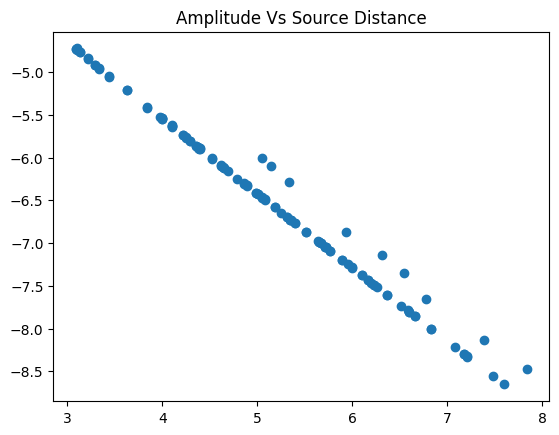

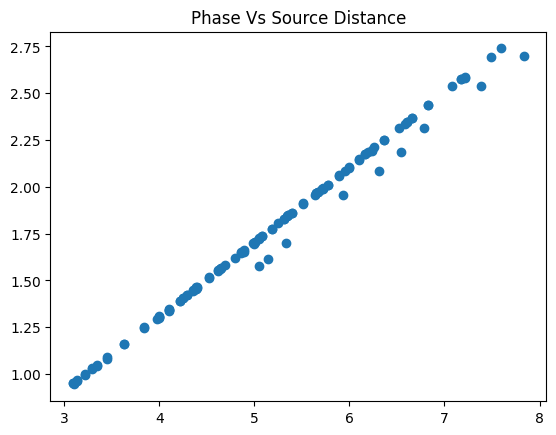

In [1166]:
visualize_phase_source(All_DATA_REF[12].astype(np.complex128))

In [1167]:
np.argmin(All_background_optics[:, 0])

np.int64(4)

In [1168]:
max_index = np.argmax(All_background_optics[:, 0])

In [1169]:
max_index

np.int64(8)

In [1170]:

# 1) make sure the folder exists
out_dir.mkdir(parents=True, exist_ok=True)
assert out_dir.exists(), f"Could not create folder: {out_dir}"

# 2) build filenames
tag = f"lesion{lesion}"
files_to_save = [
    (out_dir / f"All_measured_data_phan_{tag}.npy",     All_measured_data),
    (out_dir / f"All_ground_truth_phan_{tag}.npy",      All_ground_truth),
    (out_dir / f"All_fine_meshes_phan_{tag}.npy",       All_fine_meshes),
    (out_dir / f"All_background_optics_phan_{tag}.npy", All_background_optics),
    (out_dir / f"Target_depth_radius_phan_{tag}.npy",   Target_depth_radius),
]

# 3) save
for path, arr in files_to_save:
    np.save(path, arr)

# 4) verify
print("Saved to:", out_dir)
print("Contents:", sorted(os.listdir(out_dir)))

Saved to: /Users/luozisheng/Desktop/DOT/DOT-AE-GAN/SIMULATION_to_PERTURBATION/output/lesion_36
Contents: ['All_background_optics_phan_lesion36.npy', 'All_fine_meshes_phan_lesion36.npy', 'All_ground_truth_phan_lesion36.npy', 'All_measured_data_phan_lesion36.npy', 'Target_depth_radius_phan_lesion36.npy']


In [1171]:
All_measured_data

array([[[-0.08187734, -0.06205748, -0.03493339, ..., -0.08339313,
         -0.09253453, -0.09104699],
        [-0.08863817, -0.09017624, -0.07798927, ..., -0.08674258,
         -0.07635369, -0.07340357],
        [-0.03866754, -0.06042037, -0.08274573, ..., -0.03923029,
         -0.0241469 , -0.01982742],
        ...,
        [-0.01367716, -0.01161329, -0.00819625, ..., -0.01533498,
         -0.01491285, -0.01226171],
        [-0.00725883, -0.01110489, -0.00895871, ..., -0.00937763,
         -0.0063256 , -0.00328826],
        [-0.00987495, -0.00594322, -0.00278154, ..., -0.01134983,
         -0.0129166 , -0.01024133]],

       [[-0.13842973, -0.10555429, -0.0599855 , ..., -0.14120253,
         -0.15633581, -0.15353706],
        [-0.15009194, -0.15301307, -0.13290783, ..., -0.14709686,
         -0.12956143, -0.12442752],
        [-0.06606845, -0.10274484, -0.14022968, ..., -0.06704302,
         -0.04147357, -0.0341205 ],
        ...,
        [-0.02207609, -0.01791323, -0.01170011, ..., -

[0.02535046 3.64114816 0.02489084 3.70838377]
0.1


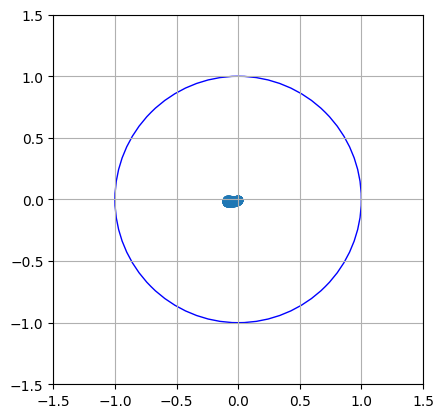

In [1172]:
 for i in range(0,len(All_background_optics), 300):
    print(All_background_optics[i])
    print(All_ground_truth[i].max())
    # Create a figure and an axis
    fig, ax = plt.subplots()

    # Create and add the circle to the axis
    circle = plt.Circle((0, 0), 1, edgecolor='b', facecolor='none')
    ax.add_patch(circle)

    # # Plot the scatter data
    # for data in All_measured_data:
    #     ax.scatter(data[0], data[1])

    ax.scatter(All_measured_data[i][:9],All_measured_data[i][9:] )

    # Set the aspect of the plot to be equal
    ax.set_aspect('equal')

    # Set limits to ensure the circle is centered and visible
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)

    # Add grid for better visualization
    ax.grid(True)

    # Display the plot
    plt.show()